In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
from sklearn.cluster import DBSCAN, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [2]:
df_1 = pd.read_csv("D:\\ds\\dataset1.csv")
df_2 = pd.read_csv("D:\\ds\\dataset2.csv")
df_3 = pd.read_csv("D:\\ds\\dataset3.csv")

### Проверка верности утверждений

1. Использование алгоритма DBSCAN позволит решить все три поставленные задачи кластеризации

In [21]:
def test_dbscan(df):
    X = df.drop("LABEL", axis=1)
    true_labels = df["LABEL"]
    model = DBSCAN(eps=2, min_samples=2).fit(X)
    pred_labels = model.labels_
    ari = adjusted_rand_score(true_labels, pred_labels)
    print(f"ARI: {ari:.2f}")
    
test_dbscan(df_1)
test_dbscan(df_2)
test_dbscan(df_3)

ARI: 1.00
ARI: 0.89
ARI: 0.57


Вывод: неверно.

2. Кластеры в dataset3 имеют форму эллипса, поэтому метод K-средних не справится с данной задачей.

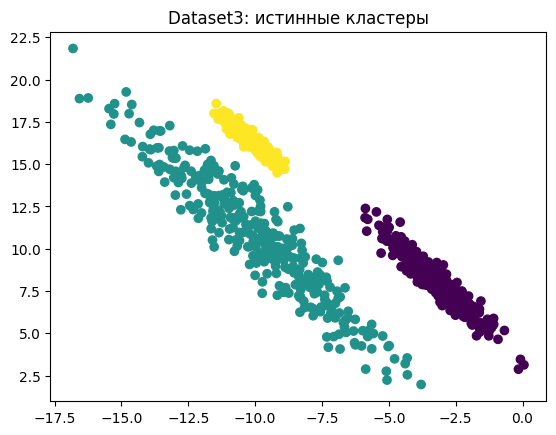

K-means ARI: 0.64
GMM ARI: 1.00


In [15]:
plt.scatter(df_3["F0"], df_3["F1"], c=df_3["LABEL"])
plt.title("Dataset3: истинные кластеры")
plt.show()

kmeans = KMeans(n_clusters=3).fit(df_3[["F0", "F1"]])
ari_kmeans = adjusted_rand_score(df_3["LABEL"], kmeans.labels_)
print(f"K-means ARI: {ari_kmeans:.2f}")

gmm = GaussianMixture(n_components=3).fit(df_3[["F0", "F1"]])
gmm_labels = gmm.predict(df_3[["F0", "F1"]])
ari_gmm = adjusted_rand_score(df_3["LABEL"], gmm_labels)
print(f"GMM ARI: {ari_gmm:.2f}")

Вывод: k-means справился хуже, но распределение не является эллипсом, поэтому утверждение неверно.

3. Кластеры из dataset2 характеризуются одинаковой дисперсией

In [17]:
clusters = df_2.groupby("LABEL")

variances = []
for _, group in clusters:
    cov_matrix = group.drop("LABEL", axis=1).cov()
    trace = np.trace(cov_matrix)
    variances.append(trace)

print("Следы ковариационных матриц:", variances)

Следы ковариационных матриц: [3.876424676318485, 24.361407478006754, 1.0422804911937102]


Вывод: неверно.

4. Среди представленных датасетов нет тех, где однозначно можно выделить кластеры.

In [22]:
def check_cluster_quality(df):
    X = df.drop("LABEL", axis=1)
    silhouette = silhouette_score(X, df["LABEL"])
    print(f"Silhouette Score: {silhouette:.2f}")

check_cluster_quality(df_1)
check_cluster_quality(df_2)
check_cluster_quality(df_3)

Silhouette Score: 0.83
Silhouette Score: 0.77
Silhouette Score: 0.51


Вывод: неверно.

5. Представленные датасеты отличаются формой кластеров.

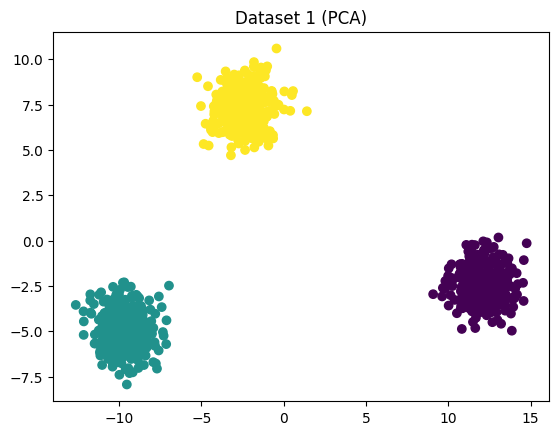

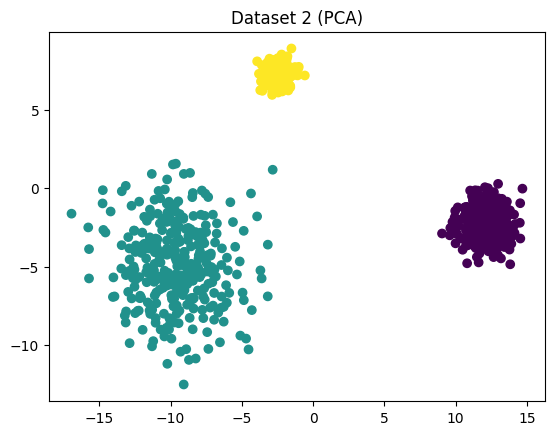

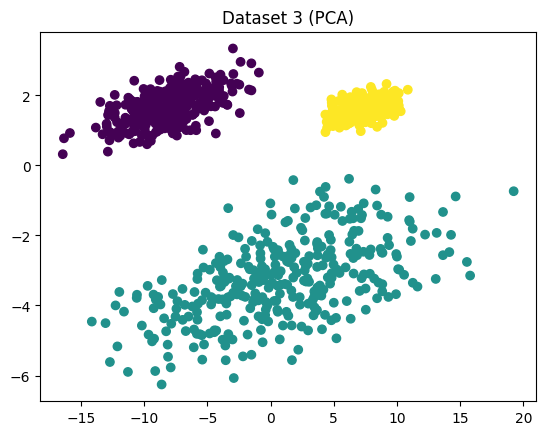

In [19]:
for i, df in enumerate([df_1, df_2, df_3], 1):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(df.drop("LABEL", axis=1))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["LABEL"])
    plt.title(f"Dataset {i} (PCA)")
    plt.show()

Вывод: верно.

6. dataset1 характеризуется большим количеством выбросов, что затрудняет кластеризацию методом K-средних.

In [24]:
iso = IsolationForest(contamination=0.1).fit(df_1.drop("LABEL", axis=1))
outliers = iso.predict(df_1.drop("LABEL", axis=1)) == -1
print(f"Выбросов в dataset1: {sum(outliers)}")

X_clean = df_1[~outliers].drop("LABEL", axis=1)
labels_clean = df_1[~outliers]["LABEL"]

kmeans = KMeans(n_clusters=3).fit(X_clean)
ari_clean = adjusted_rand_score(labels_clean, kmeans.labels_)
print(f"ARI после удаления выбросов: {ari_clean:.2f}")

Выбросов в dataset1: 100
ARI после удаления выбросов: 1.00


Вывод: верно.

Проведите кластеризацию данных из dataset1 методом k-средних с количеством кластеров равным 3 (для однозначного результата используйте random_state=42). Получите центры кластеров. Введите значение 4-й координаты центра для последнего кластера в поле ответов, округлив до 3-го знака после запятой. В качестве разделителя дробной и целой части используйте символ точки «.».

In [25]:
X = df_1.drop('LABEL', axis=1)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
centers = kmeans.cluster_centers_
print("Центры кластеров:\n", centers)

last_cluster_f3 = centers[2, 3]
rounded_value = round(last_cluster_f3, 3)
print("Ответ:", rounded_value)

Центры кластеров:
 [[ 2.08128181  4.08135021 -9.6546176   9.43829232]
 [-2.47972233  9.03626136  4.68100968  2.02428364]
 [-6.8836951  -6.74468537 -8.85281957  7.31515829]]
Ответ: 7.315


Произведите процедуру кластеризации данных из dataset2 двумя способами. Первый способ – разбиение данных на 2 кластера с помощью метода k-средних (для однозначного результата используйте random_state=42). Второй способ – разбиение на 2 кластера с помощью иерархического метода полной связи (complete-linkage clustering) и критерия maxclust для формирования кластеров. Выберете верные утверждения. Обратите внимание, что обозначения cluster_0, cluster_1, cluster_2 соответствуют нумерации ожидаемых кластеров, которые указаны в колонке ‘LABEL’.

In [26]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(df_2.drop('LABEL', axis=1))

print("K-means центры:\n", kmeans.cluster_centers_)
print("K-means метки:\n", kmeans_labels)

K-means центры:
 [[-2.41900297 -1.21007407 -9.24801058  8.36042801]
 [-2.47972233  9.03626136  4.68100968  2.02428364]]
K-means метки:
 [1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0
 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1
 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0
 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 

In [28]:
distance_matrix = pdist(df_2.drop('LABEL', axis=1))
hierarchical = linkage(distance_matrix, method='complete')
hierarchical_labels = fcluster(hierarchical, t=2, criterion='maxclust') - 1

print("Иерархические метки:\n", hierarchical_labels)

Иерархические метки:
 [1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1
 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1
 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1
 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1
 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0
 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1
 1 

In [29]:
print("K-means vs LABEL:")
print(pd.crosstab(kmeans_labels, df_2['LABEL']))
print("\nИерархические vs LABEL:")
print(pd.crosstab(hierarchical_labels, df_2['LABEL']))

K-means vs LABEL:
LABEL    0    1    2
row_0               
0        0  333  333
1      334    0    0

Иерархические vs LABEL:
LABEL    0    1    2
row_0               
0        0  333    0
1      334    0  333


1. Все объекты распределились равномерно по двум кластерам
- Нет. В иерархической кластеризации:
  - Кластер 0: 333 объекта.
  - Кластер 1: 334 + 333 = 667 объектов.
- Неверно.

2. Результаты K-means и иерархической кластеризации согласуются
- Нет. K-means объединил cluster_1 + cluster_2, а иерархический — cluster_0 + cluster_2.
- Неверно.

3. K-means: объекты из cluster_2 распределены в разные кластеры
- Нет. Все 333 объекта cluster_2 попали в один кластер (кластер 0).
- Неверно.

4. Иерархическая кластеризация: все cluster_2 в одном кластере
- Да. Все 333 объекта cluster_2 находятся в кластере 1.
- Верно.

5. Алгоритмы дали разные результаты: K-means объединил cluster_1+2, иерархический — cluster_0+2
- Да. Это видно из таблиц.
- Верно.

6. K-means: все cluster_0 в одном кластере
- Да. Все 334 объекта cluster_0 находятся в кластере 1.
- Верно.

7. Иерархическая кластеризация: все cluster_0 в одном кластере
- Да. Все 334 объекта cluster_0 находятся в кластере 1.
- Верно.

Произведите процедуру кластеризации данных из dataset3 методом DBSCAN с использованием евклидовой метрики для оценки расстояния, а также радиусом равным 0.3 и минимальное количество точек равным 10. Сколько кластеров получилось?

In [30]:
dbscan = DBSCAN(eps=0.3, min_samples=10, metric='euclidean')
clusters = dbscan.fit_predict(df_3.drop('LABEL', axis=1))
unique_clusters = set(clusters) - {-1}
num_clusters = len(unique_clusters)
print("Метки кластеров:", clusters)
print("Число кластеров:", num_clusters)

Метки кластеров: [-1  0 -1  2  0  1 -1 -1 -1  0  2 -1  2  2  2  2  2 -1  0 -1 -1  0 -1 -1
 -1  0  2  0  0 -1 -1 -1  0  0  0  0  2 -1  0 -1 -1  0 -1  3  0  2  0  3
  0 -1  2  0 -1 -1  1 -1 -1 -1 -1 -1  2 -1  0 -1 -1  0  2 -1 -1 -1 -1  1
  0  0  2 -1 -1  0 -1  2  2 -1 -1 -1 -1  2 -1  0 -1 -1  0 -1  5 -1 -1  0
  0  2  2  3 -1 -1  0 -1 -1 -1  2 -1 -1  0  1 -1 -1  0  0 -1  0 -1  0 -1
 -1 -1  2 -1 -1  0 -1 -1  0 -1 -1  0 -1 -1  4 -1 -1 -1  0 -1 -1 -1 -1 -1
 -1 -1 -1 -1  2 -1  4  0  0  0  0 -1 -1 -1 -1  2 -1 -1  2 -1 -1  0  0  0
 -1 -1 -1  2  2 -1  0  0  5  0  0  0 -1  2 -1  4  2  4 -1  0 -1 -1  0 -1
  0 -1  0  1  0 -1  2  0 -1 -1 -1  0 -1 -1  0  2  0  0  0  2  0  0  2 -1
  1 -1 -1  0 -1 -1 -1  0  1 -1  0  0  0  1  5  0 -1  3  0  0 -1  0 -1 -1
 -1  0 -1 -1  0 -1 -1 -1 -1  0  0  0  0 -1 -1 -1 -1  1  0 -1  0  1 -1  0
  2  0 -1 -1  0  0  0 -1  2  0  0 -1  2 -1  1 -1  5  5  5 -1 -1  5 -1  1
 -1 -1  2  0 -1 -1  2  2  2  0 -1 -1 -1  2 -1  0 -1  0 -1  2 -1 -1 -1  0
  0 -1 -1 -1  2  0  0 -1  1  0  0 

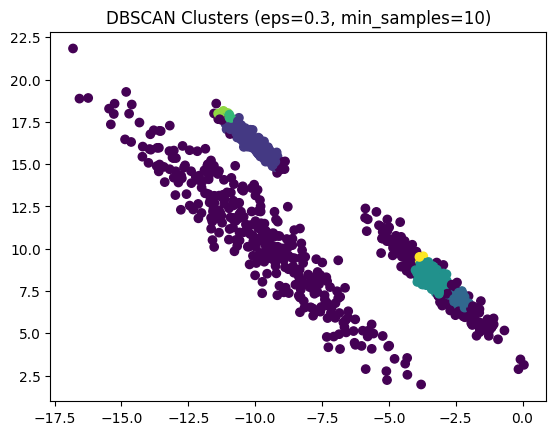

In [31]:
plt.scatter(df_3['F0'], df_3['F1'], c=clusters, cmap='viridis')
plt.title('DBSCAN Clusters (eps=0.3, min_samples=10)')
plt.show()

Произведите процедуру кластеризации данных из dataset3 методом DBSCAN с использованием евклидовой метрики для оценки расстояния, а также радиусом равным 1.5 и минимальное количество точек равным 8. Выберете верные утверждения. Обратите внимание, что обозначения cluster_0, cluster_1, cluster_2 соответствуют нумерации ожидаемых кластеров, которые указаны в колонке ‘LABEL’.

In [32]:
dbscan = DBSCAN(eps=1.5, min_samples=8, metric='euclidean')
clusters = dbscan.fit_predict(df_3[['F0', 'F1', 'F2', 'F3']])
unique_labels = np.unique(clusters)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
noise_points = sum(clusters == -1)

print("Метки кластеров:", clusters)
print("Число кластеров:", num_clusters)
print("Точек шума:", noise_points)

Метки кластеров: [ 0  1  2  0  1  0  2  0  2  1  0  2  0  0  0  0  0 -1  1  0  2  1  2  0
  2  1  0  1  1  2  2  2  1  1  1  1  0  2  1  0  2  1  2  1  1  0  1  1
  1  2  0  1  2  2  0  0  2  2  2  2  0  0  1  0  2  1  0  2  0  2  0  0
  1  1  0  0  2  1  2  0  0  0  0  2  2  0  0  1  2  0  1  2  0  2 -1  1
  1  0  0  1  0  2  1  2 -1  2  0  2  2  1  0  2  2  1  1  2  1  2  1  2
  2  2  0  2  2  1  0  2  1  2  2  1  1  2  1  2  0  2  1  2  2  0  2  2
  2  2  0  2  0  2  1  1  1  1  1  2  2  1  0  0  2  2  0  2  0  1  1  1
  2  2  2  0  0  2  1  1  0  1  1  1  2  0  2  1  0  1  0  1  0  2  1  2
  1  2  1  0  1  2  0  1  0  2  2  1  0  2  1  0  1  1  1  0  1  1  0  0
  0  2  0  1  2  2  0  1  0  2  1  1  1  0  0  1  2  1  1  1  2  1  0  2
  2  1  0  0  1  0  2  2  2  1  1  1  1  2  0  2  2  0  1  2  1  0  2  1
  0  1  0  2  1  1  1  2  0  1  1  2  0  0  0  2  0  0  0  2  0  0  2  0
  2  2  0  1  0  2  0  0  0  1  2  2  0  0  2  1  2  1  0  0  0  2  2  1
  1  0  2  0  0  1  1  0  0  1  1 